In [76]:
#!/usr/bin/env python
# coding: utf-8



In [77]:
import pandas as pd

import numpy as np

import pickle

import matplotlib.pyplot as plt

get_ipython().run_line_magic('matplotlib', 'inline')

import seaborn as sns

import sklearn

from sklearn. tree import DecisionTreeClassifier

In [78]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import RandomizedSearchCV

import imblearn

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [79]:
data = pd.read_csv('D:\project files\loan_prediction.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [80]:
data.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [81]:
data.drop(['Loan_ID'],inplace=True,axis=1)

In [82]:
data['Gender']=data['Gender'].map({'Female':1,'Male':0})
data['Property_Area']=data['Property_Area'].map({'Urban':2,'Semiurban':1,'Rural':0})
data['Married']=data['Married'].map({'Yes':1,'No':0})
data['Education']=data['Education'].map({'Graduate':1,'Not Graduate':0})
data['Self_Employed']=data['Self_Employed'].map({'Yes':1,'No':0})
data['Loan_Status']=data['Loan_Status'].map({'Y':1,'N':0})


In [83]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0.0,1,0.0,5849,0.0,0.0,360.0,1.0,2,1
1,0.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,0.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,0.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,0.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1


In [84]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [85]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mode()[0])
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])
data['Loan_Status'] = data['Loan_Status']

In [86]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 57.7 KB


C:\Users\karth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\karth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


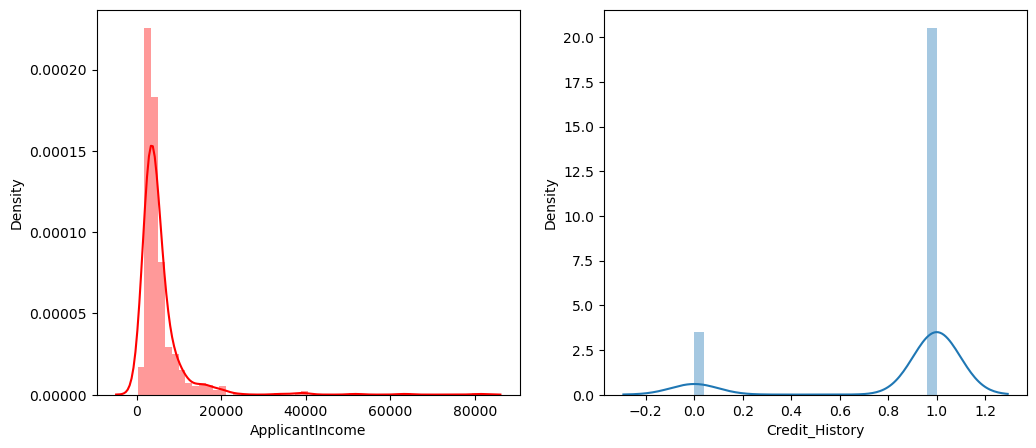

In [88]:
plt.figure(figsize=(12,5))

plt.subplot(121)

sns.distplot(data['ApplicantIncome'], color='r')

plt.subplot(122)

sns.distplot(data['Credit_History'])

plt.show()

C:\Users\karth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\karth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


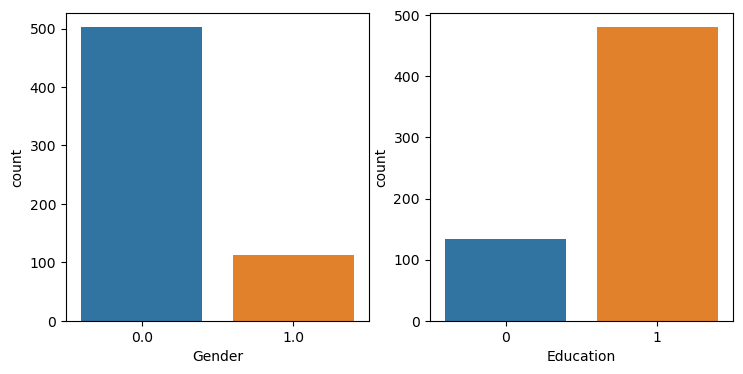

In [89]:
plt.figure(figsize=(18,4))

plt.subplot(1,4,1)

sns.countplot(data["Gender"])

plt.subplot(1,4,2)

sns.countplot(data["Education"])

plt.show()

C:\Users\karth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\karth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\karth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

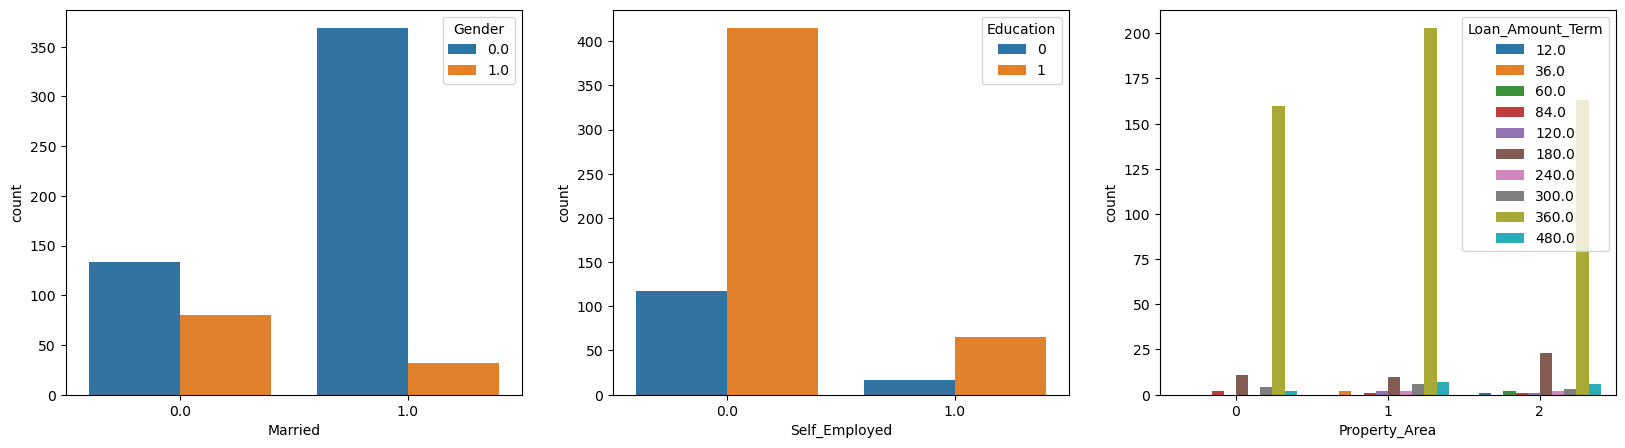

In [90]:
plt.figure(figsize=(20,5))

plt.subplot(131)

sns.countplot(data['Married'], hue=data['Gender'])

plt.subplot(132)

sns.countplot(data['Self_Employed'], hue=data['Education'])

plt.subplot(133)

sns.countplot(data['Property_Area'], hue=data['Loan_Amount_Term'])

C:\Users\karth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\karth\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 61.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\karth\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

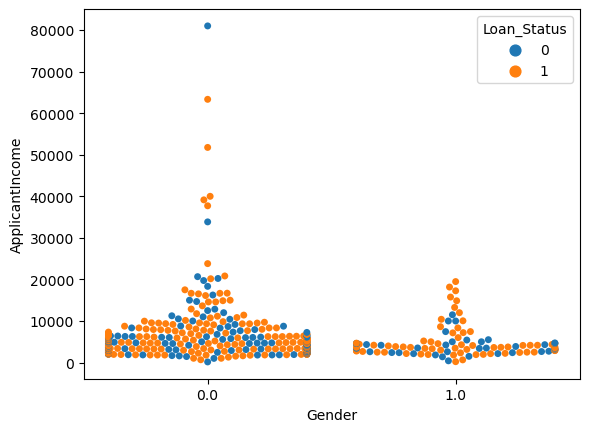

In [91]:
sns.swarmplot(data['Gender'], data['ApplicantIncome'], hue = data['Loan_Status'])

In [92]:
pd.crosstab(data['Gender'],[data['Self_Employed']])

Self_Employed,0.0,1.0
Gender,,
0.0,435,67
1.0,97,15


C:\Users\karth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\karth\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 61.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\karth\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

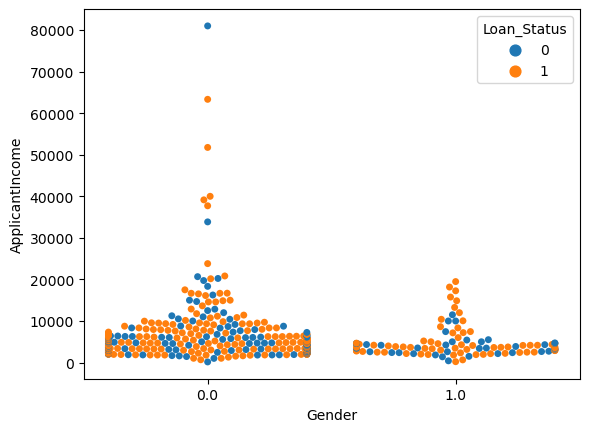

In [93]:
sns.swarmplot(data['Gender'],data['ApplicantIncome'], hue = data['Loan_Status'])

In [94]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [95]:
from imblearn.combine import SMOTETomek

In [96]:
smote = SMOTETomek (0.90)

C:\Users\karth\anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.9 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [97]:
y = data['Loan_Status']
x = data.drop(columns=['Loan_Status'], axis=1)

In [98]:
x.shape


(614, 11)

In [99]:
y.shape




(614,)

In [100]:
x_bal,y_bal=smote.fit_resample((x),(y))


In [101]:
print(y.value_counts())
print(y_bal.value_counts())


1    422
0    192
Name: Loan_Status, dtype: int64
1    359
0    316
Name: Loan_Status, dtype: int64


In [102]:
names = x_bal.columns


In [103]:
#performing the feature scaling operation using StandardScaler on x part o f dataset 
# because of different type of values
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [104]:
x_bal = ss.fit_transform(x_bal)

In [105]:
x_bal = pd.DataFrame(x_bal,columns=names)

In [106]:
x_bal

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-0.518820,-1.362716,-0.740995,0.614452,-0.416754,0.106870,-0.561148,-1.799499,0.277275,0.524900,1.324571
1,-0.518820,0.789949,-0.740995,0.614452,2.656879,-0.404520,-0.561148,-0.965299,0.277275,0.524900,1.324571
2,-0.518820,0.789949,-0.740995,-1.627467,-0.416754,-0.479371,0.277691,-0.282772,0.277275,0.524900,1.324571
3,-0.518820,-1.362716,-0.740995,0.614452,-0.416754,0.133974,-0.561148,-0.017345,0.277275,0.524900,1.324571
4,-0.518820,0.789949,1.350996,0.614452,2.656879,0.029327,0.931544,1.575219,0.277275,0.524900,1.324571
...,...,...,...,...,...,...,...,...,...,...,...
670,0.081185,-0.865679,-0.499481,0.614452,0.292929,1.190141,-0.561148,0.629401,0.277275,-0.095453,0.034404
671,-0.518820,0.747576,2.355811,-1.627467,-0.356251,-0.467524,0.003099,0.391346,0.277275,0.524900,-1.255762
672,-0.518820,-0.586308,0.013530,-1.627467,-0.416754,-0.439881,-0.561148,-1.069112,-1.319764,-0.444135,-1.255762
673,-0.518820,0.789949,0.153849,-1.627467,-0.416754,-0.281025,0.495075,0.110876,0.277275,0.136652,-1.255762


In [107]:
x_bal = pd.DataFrame(x_bal,columns = names)


In [108]:
#splitting the dataset train and test on balanced 

x_train,x_test,y_train,y_test = train_test_split(x_bal,y_bal,test_size=0.33,random_state=42)

In [109]:
x_train.shape, x_test.shape


((452, 11), (223, 11))

In [110]:
def decisionTree(x_train, x_test, y_train, y_test)
     dt DecisionTreeClassifier()
     dt.fit(x_train,y_train) 
     yPred = dt.predict(x_test) 
     print("***DecisionTreeClassifier****)
     print('Confusion matrix')
     print(confusion_matrix(y_test,yPred)) 
     print('Classification report') 
     print(classification_report (y_test, yPred))

SyntaxError: invalid syntax (2607020297.py, line 1)

In [111]:
#importing and modeling the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
def decisionTree(x_train,x_test,y_train,y_test):
    model = DecisionTreeClassifier()
    model.fit(x_train,y_train)
    y_tr = model.predict(x_train)
    print(accuracy_score(y_tr,y_train))
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(accuracy_score(y_pred,y_test))

In [112]:
decisionTree(x_train,x_test,y_train,y_test)


1.0
0.757847533632287


In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
def RandomForest(x_train,x_test,y_train,y_test):
    model = RandomForestClassifier()
    model.fit(x_train,y_train)
    y_tr = model.predict(x_train)
    print(accuracy_score(y_tr,y_train))
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(accuracy_score(y_pred,y_test))
    
    

In [114]:
RandomForest(x_train,x_test,y_train,y_test)

1.0
0.7802690582959642


In [115]:
#importing and modeling the KNN
from sklearn.neighbors import KNeighborsClassifier
def KNN(x_train,x_test,y_train,y_test):
    model = KNeighborsClassifier()
    model.fit(x_train,y_train)
    y_tr = model.predict(x_train)
    print(accuracy_score(y_tr,y_train))
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(accuracy_score(y_pred,y_test))

In [116]:
KNN(x_train,x_test,y_train,y_test)

0.8141592920353983
0.7130044843049327


In [117]:
#importing and modeling the xgboost
from xgboost import XGBClassifier
def XGB(x_train,x_test,y_train,y_test):
    model = XGBClassifier()
    model.fit(x_train,y_train)
    y_tr = model.predict(x_train)
    print(accuracy_score(y_tr,y_train))
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(accuracy_score(y_pred,y_test))

In [118]:
XGB(x_train,x_test,y_train,y_test)

1.0
0.7892376681614349


In [119]:
decisionTree(x_train,x_test,y_train,y_test)


1.0
0.7399103139013453


In [120]:
RandomForest(x_train,x_test,y_train,y_test)

1.0
0.7757847533632287


In [121]:
XGB(x_train,x_test,y_train,y_test)

1.0
0.7892376681614349


In [122]:
from sklearn.model_selection import cross_val_score

In [123]:
# Random forest model is selected
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
yPred = rf.predict(x_test)

In [124]:
f1_score(yPred,y_test, average='weighted')

0.7740921342063707

In [125]:
cv=cross_val_score(rf,x,y,cv=5)

In [126]:
np.mean(cv)

0.7866453418632547

#saviung the model by using pickle function
pickle.dump(open('rdf.pk1','wb'))

In [129]:
from flask import Flask, render_template, request
import numpy as np
import pickle

In [130]:
app = Flask (__name__)
model= pickle.load(open (r'rdf.pkl', 'rb')) 
scale = pickle.load(open(r'scale1.pkl', 'rb'))

FileNotFoundError: [Errno 2] No such file or directory: 'rdf.pkl'